# Predicting Heart Disease using machine learning
This notebook looks into using various python-based machine learning and data science libraries in an attempt to build a machine learnig model capable of predicting whether or not someone has heart disease based on their medical attributes.
Approaches
1. Problem Defination
2. Data
3. Evaluation 
4. Faeatures
5. Modelling
6. Experimentation

## 1. Problem Defination
In a statement,
> Given clincal parameters about a patient, can we predict whether or not they have heart disease?
## 2. Data
The original data came from the UCI machine learning repository
https://archive.ics.uci.edu/dataset/45/heart+disease
## 3. Evaluation
>If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll persue the project.
## 4.Features
**Create data dictionary**
* id (Unique id for each patient)
* age (Age of the patient in years)
* origin (place of study)
* sex (Male/Female)
* cp chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])
* trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
* chol (serum cholesterol in mg/dl)
* fbs (if fasting blood sugar > 120 mg/dl)
* restecg (resting electrocardiographic results)
* -- Values: [normal, stt abnormality, lv hypertrophy]
* thalach: maximum heart rate achieved
* exang: exercise-induced angina (True/ False)
* oldpeak: ST depression induced by exercise relative to rest
* slope: the slope of the peak exercise ST segment
* ca: number of major vessels (0-3) colored by fluoroscopy
* thal: [normal; fixed defect; reversible defect]
* num: the predicted attribute



In [6]:
#Prepareing the tools
# Regular EDA(Exploratory Data Analysis) and plotting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#plots to appear inside the notebook
%matplotlib inline 

#Models from scikit learn

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

#Model Evaluation
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import RocCurveDisplay


## Load data

In [11]:
df = pd.read_csv('./data/heart-disease.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


<Axes: xlabel='target'>

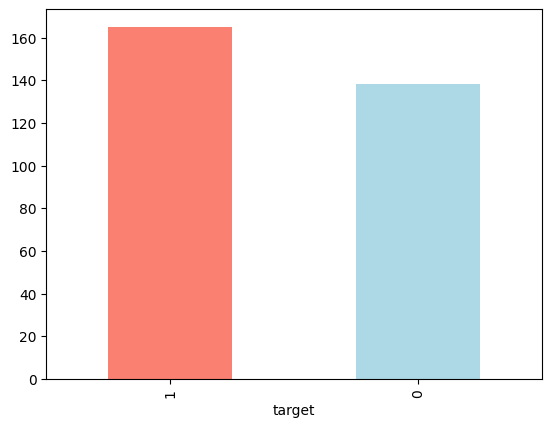

In [13]:
#whats the output looks like, 1 is heart disease and 0 is no heart disease, 
df['target'].value_counts().plot(kind='bar',color=['salmon','lightblue'])

In [14]:
#is there a missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# Finding Patterns in Data
## Heart disease Frequency according to Sex

In [15]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [16]:
df['sex'].value_counts()

sex
1    207
0     96
Name: count, dtype: int64

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

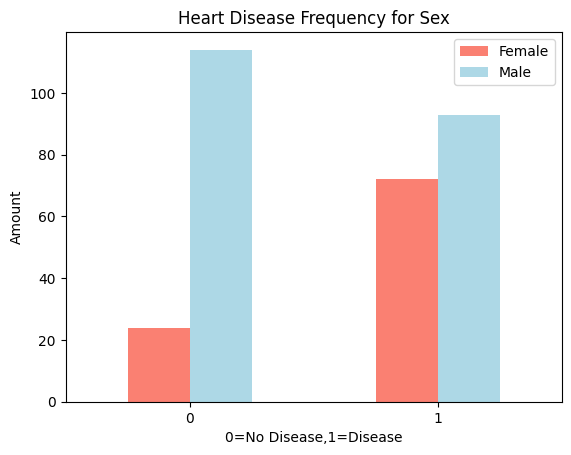

In [24]:
#Create a plot of crosstab
#Comparing Independent column with the target column
pd.crosstab(df.target,df.sex).plot(kind='bar', color = ['salmon','lightblue'])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel("0=No Disease,1=Disease")
plt.ylabel("Amount")
plt.legend(['Female','Male'])
plt.xticks(rotation=0)

## Age vs. Max Heart Rate for Heart Disease

/var/folders/xp/d9v61d7d3tg_g53gtw8s1j9w0000gp/T/ipykernel_54615/3205563804.py:14: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/users/explain/axes/legend_guide.html#controlling-the-legend-entries
  plt.legend('Disease','No disease')


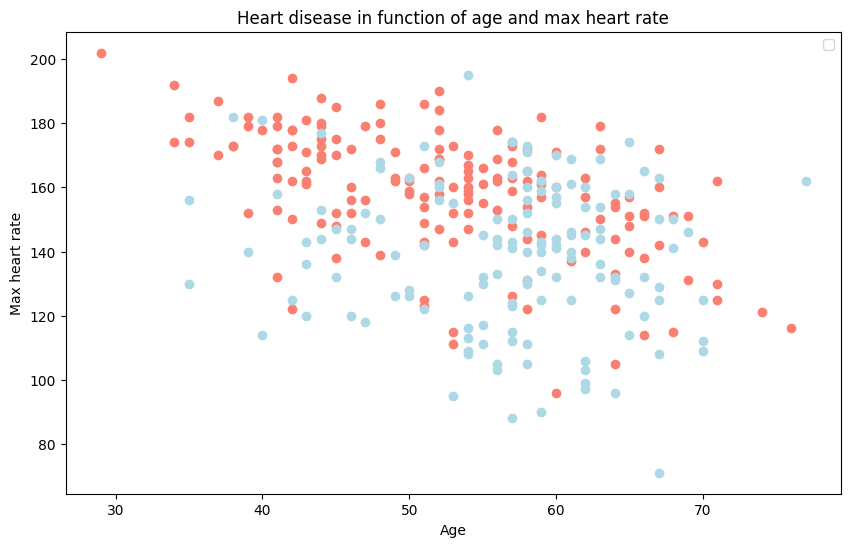

In [33]:
df['age'].value_counts()# since this has more different values using scatten plot
plt.figure(figsize=(10,6))
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c="salmon")#using only positive example 

plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c="lightblue")#using only negative example 

plt.title('Heart disease in function of age and max heart rate')
plt.xlabel('Age')
plt.ylabel('Max heart rate')
plt.legend('Disease','No disease')

<Axes: ylabel='Frequency'>

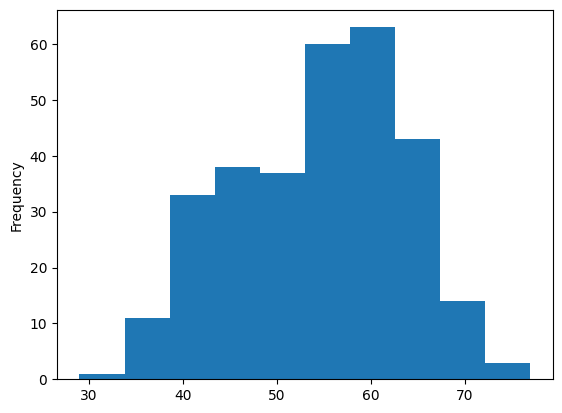

In [36]:
df.age.plot.hist()

## Heart disease frequency per chest pain type
cp chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])

/var/folders/xp/d9v61d7d3tg_g53gtw8s1j9w0000gp/T/ipykernel_54615/4184598.py:5: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/users/explain/axes/legend_guide.html#controlling-the-legend-entries
  plt.legend('No Disease','Disease')


(array([0, 1, 2, 3]),
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

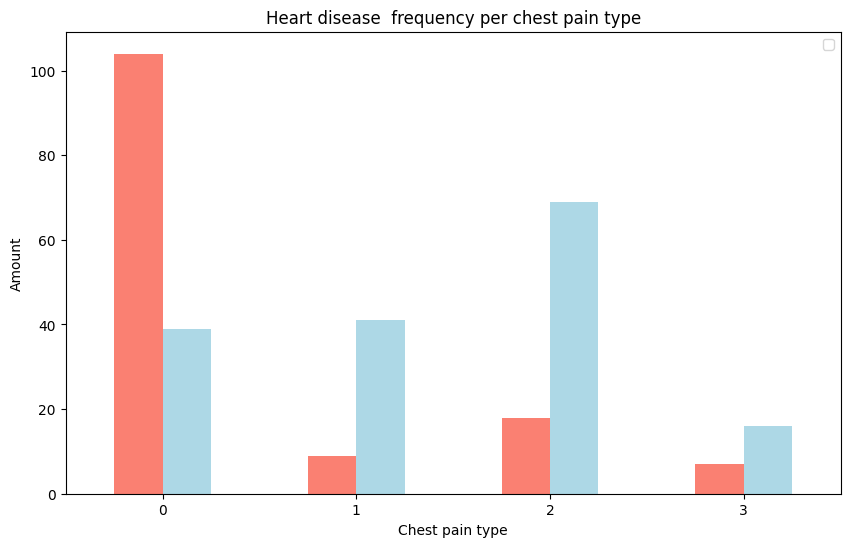

In [39]:
pd.crosstab(df.cp,df.target).plot(kind='bar',figsize=(10,6),color=['salmon','lightblue'])
plt.title('Heart disease  frequency per chest pain type')
plt.xlabel('Chest pain type')
plt.ylabel('Amount')
plt.legend('No Disease','Disease')
plt.xticks(rotation=0)

## Make a correlation matrix

(14.5, -0.5)

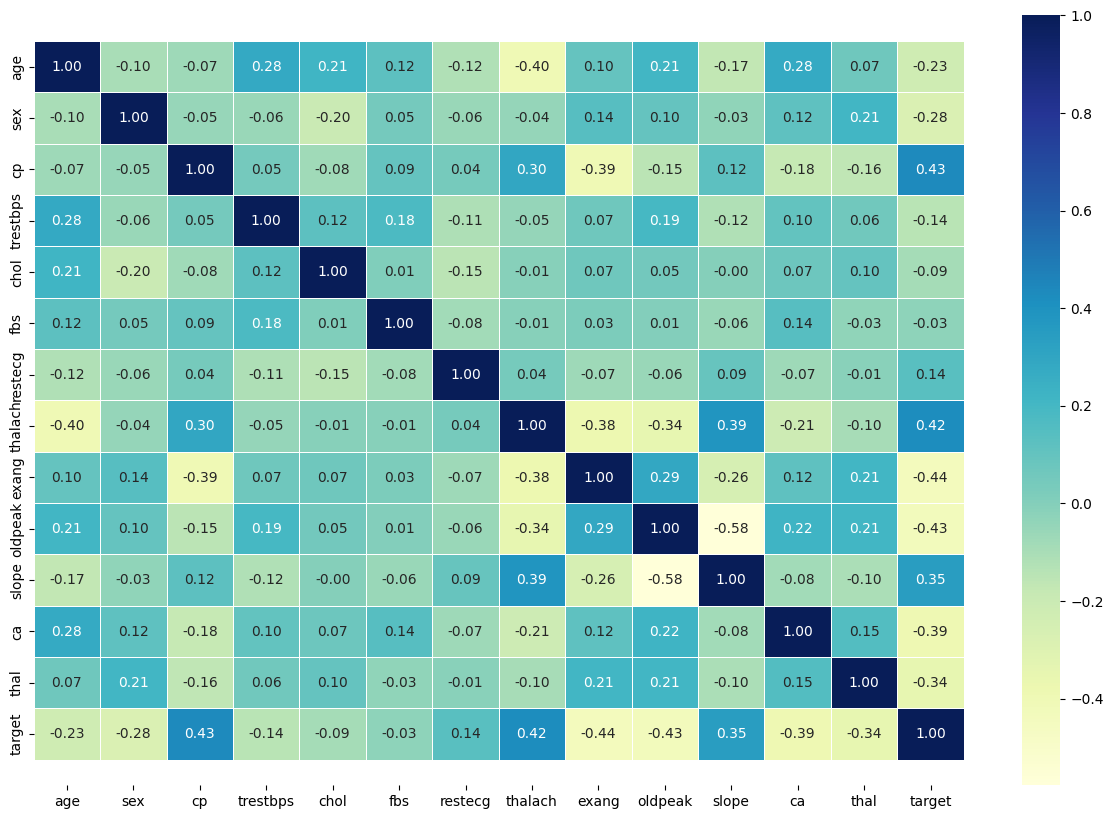

In [41]:
corr_matrix = df.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt='.2f',
                cmap='YlGnBu');
bottom,top = ax.get_ylim()
ax.set_ylim(bottom+0.5,top-0.5)

# Modelling

In [42]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [43]:
X=df.drop('target',axis=1)
Y=df['target']
# Split the data into train and test set
np.random.seed(42)
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)


In [44]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [45]:
Y_train

132    1
202    0
196    0
75     1
176    0
      ..
188    0
71     1
106    1
270    0
102    1
Name: target, Length: 242, dtype: int64

## Choosing the right model
Will try 3 Mchine learning models
1. Logistic Regression
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier



In [49]:
# Put models in a dictionary
models = {'Logistic Regression': LogisticRegression(),
        'KNN':KNeighborsClassifier(),
        'Random Forest':RandomForestClassifier()}

#Create a function to fit and score models
def fit_and_score(models,X_train,X_test,Y_train,Y_test):
    '''Fit and evaluates the model
        models: a dict of different machine learning models
        X_train: training data(no labels)
        X_test:testing data(no labels)
        Y_train: training labels
        Y_test: testing labels
    '''
    model_score = {}
    for name,model in models.items():
        model.fit(X_train,Y_train)
        model_score[name] = model.score(X_test,Y_test)
    return model_score



In [51]:
model_scores = fit_and_score(models=models,X_train=X_train,X_test=X_test,Y_train=Y_train,Y_test=Y_test)
model_scores

/usr/local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8688524590163934}

## Model comparision

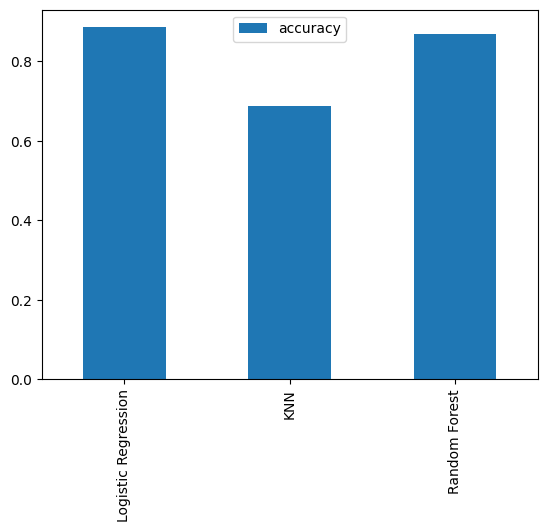

In [52]:
model_compare = pd.DataFrame(model_scores,index=['accuracy'])
model_compare.T.plot.bar();

# Lets look at the following
* Hyperparameter tuning
* Feature importance
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classification report
* ROC curve
* Area under the curve (AUC)